In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import glob
from itertools import groupby
import matplotlib.pyplot as plt
from fastai import *
from fastai.vision import *
from google.colab import drive
import pandas as pd
import numpy as np
import collections

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import gridspec
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [40]:
# define a couple of constants
IMG_HEIGHT  = 224
IMG_WIDTH   = 224
BATCH_SIZE  = 32
EPOCHS      = 20
SEED        = 1234
strPath     = "/content/drive/MyDrive/Art/Images/Images"

In [41]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  strPath,
  validation_split = 0.2,
  subset     = "training",
  seed       = SEED,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE)

Found 755 files belonging to 15 classes.
Using 604 files for training.


In [42]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  strPath,
  validation_split = 0.2,
  subset     = "validation",
  seed       = SEED,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE)


Found 755 files belonging to 15 classes.
Using 151 files for validation.


In [43]:
# get the artists names
class_names = train_dataset .class_names

# define for later
num_classes = len(class_names)

print(class_names)

['Chandra Sarkar', 'DarkaakArts', 'Farjan Shahriar Abeg', 'Icecream Stick Art', 'Injamamul Adittya', 'Inksmith', 'Mahatab Rashid', 'Nishat Binte Monsur', 'Nycto', 'Salman Sakib', 'TarTin', 'Teabag Stories', 'The Bathroom Artist', 'The Panicked Architect', 'Zarin']


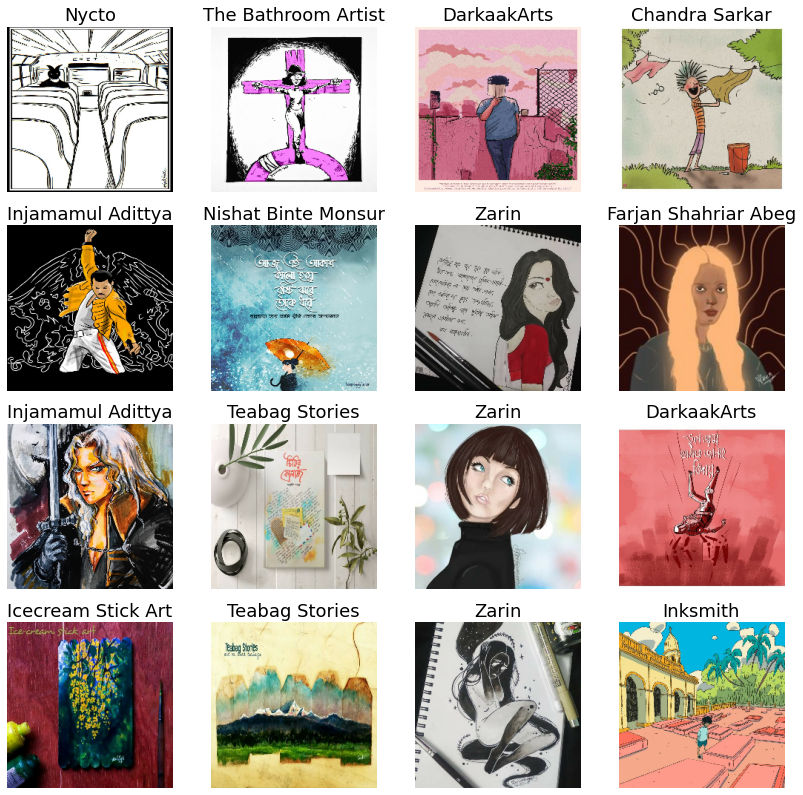

In [44]:
plt.figure(figsize=(14, 14))
for images, labels in train_dataset .take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [45]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [47]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 4
Number of test batches: 1


In [48]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [50]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [51]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [52]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.2), 
    layers.experimental.preprocessing.RandomTranslation(0.3,0.2), 
    layers.experimental.preprocessing.RandomContrast(0.2)
  ]
)

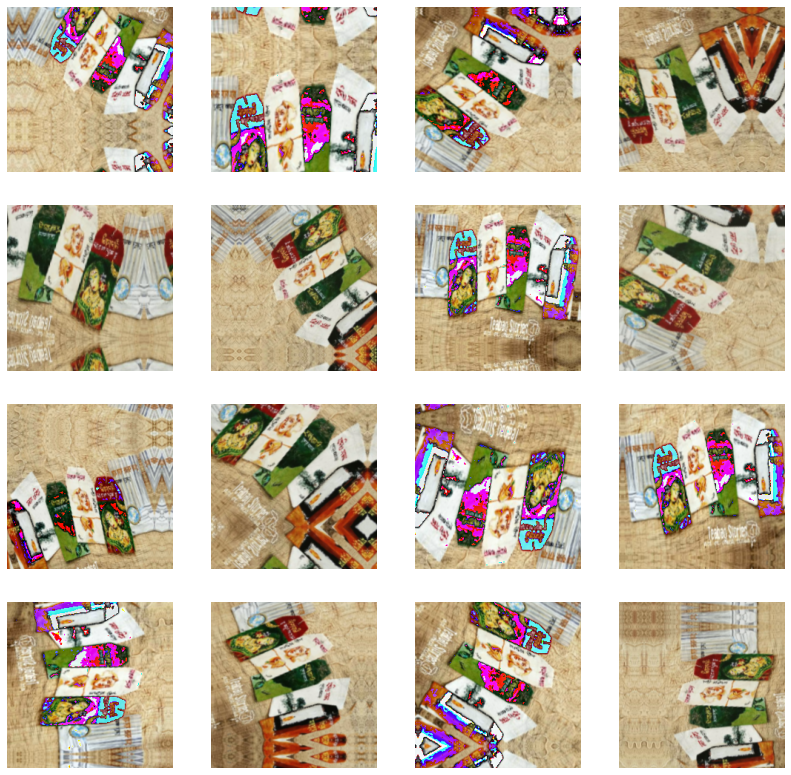

In [53]:
plt.figure(figsize=(14, 14))
for images, _ in train_dataset.take(1):
  for i in range(16):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [59]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (7,7), 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2),2),
  layers.Conv2D(32, (5,5), 2, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2),2),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2),2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [60]:
#define model ingredients 
opti = tf.keras.optimizers.RMSprop(momentum=0.1) 
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
metr = ['accuracy']

#compile model 
model.compile(optimizer = opti, 
              loss = loss, 
              metrics = metr)

In [61]:

history = model.fit(
  train_dataset,
  validation_data = validation_dataset,
  epochs          = EPOCHS
)

Epoch 1/20
19/19 [==============================] - 26s 1s/step - loss: 2.7105 - accuracy: 0.1281 - val_loss: 2.6177 - val_accuracy: 0.1681
Epoch 2/20
19/19 [==============================] - 24s 1s/step - loss: 2.5835 - accuracy: 0.1614 - val_loss: 2.6286 - val_accuracy: 0.1597
Epoch 3/20
19/19 [==============================] - 24s 1s/step - loss: 2.5849 - accuracy: 0.1574 - val_loss: 2.5511 - val_accuracy: 0.2185
Epoch 4/20
19/19 [==============================] - 24s 1s/step - loss: 2.5765 - accuracy: 0.1743 - val_loss: 2.4952 - val_accuracy: 0.2269
Epoch 5/20
19/19 [==============================] - 24s 1s/step - loss: 2.4422 - accuracy: 0.1998 - val_loss: 2.6399 - val_accuracy: 0.2101
Epoch 6/20
19/19 [==============================] - 24s 1s/step - loss: 2.4332 - accuracy: 0.2053 - val_loss: 2.4252 - val_accuracy: 0.2941
Epoch 7/20
19/19 [==============================] - 24s 1s/step - loss: 2.3675 - accuracy: 0.2318 - val_loss: 2.4111 - val_accuracy: 0.1681
Epoch 8/20
19/19 [==

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 16)        2368      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 64)         

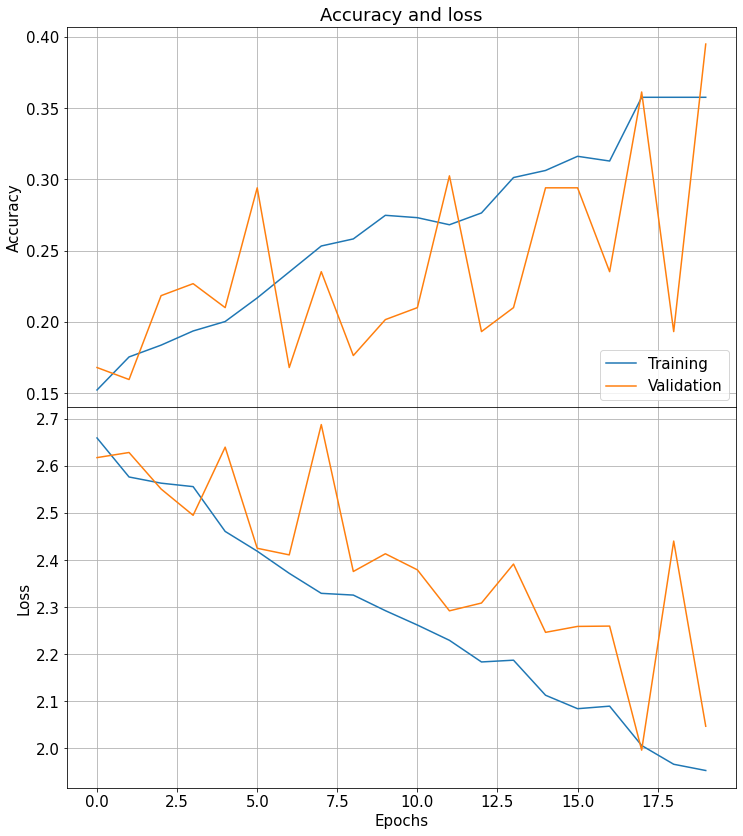

In [64]:
# get the values
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


# show the results
epochs_range = range(EPOCHS)


plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(12, 14))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

ax0 = plt.subplot(gs[0])
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title('Accuracy and loss')
plt.ylabel("Accuracy")
plt.grid(True)

ax1 = plt.subplot(gs[1], sharex = ax0)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

plt.subplots_adjust(hspace=.0)
plt.show()

In [66]:
#save??????
#modelDirectory = r'resources\smart_face_mask_detector.model'
modelDirectory = "/content/drive/MyDrive/Art/type-c-2-baseline-cnn-model.model"
model.save(modelDirectory, save_format="h5")

In [67]:
#load_saved_model
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Art/type-c-2-baseline-cnn-model.model')
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 16)        2368      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 64)         

Icecream Stick Art_4.jpg
8


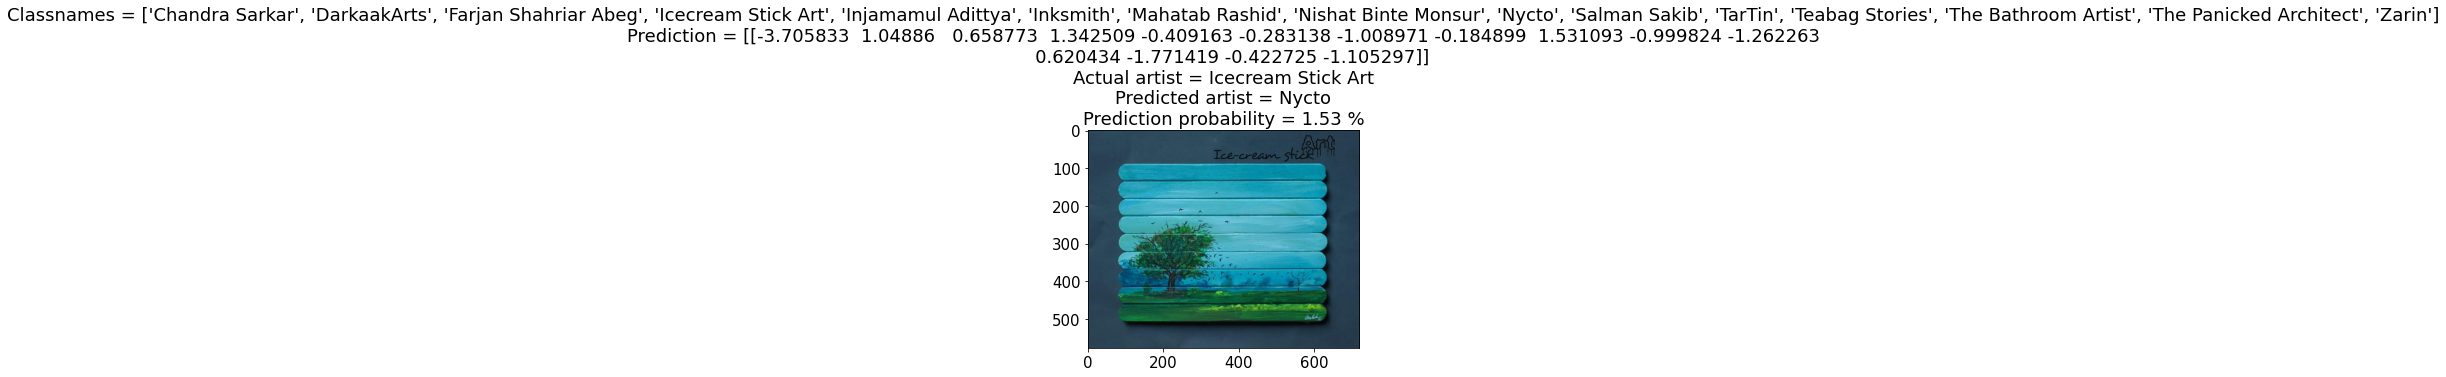

In [78]:
# Prediction
from keras.preprocessing import *
from PIL import Image

n = 2
testpath     = "/content/drive/MyDrive/Art/TestData/"
train_input_shape = (224, 224, 3)

for i in range(0,1):
    #random_artist = random.choice(artists_top_name)
    random_image = random.choice(os.listdir(testpath))
    random_image_file = os.path.join(testpath, random_image)
    print(random_image)
    test_image = Image.open(random_image_file) 
    test_image = test_image.resize(train_input_shape[0:2])

    test_image = np.array(test_image)
    test_image = test_image / 255.0
    test_image = np.expand_dims(test_image, axis=0)

    prediction = new_model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    print(prediction_idx)
    #sorted_prediction = prediction[0].sort()

    # convert the probabilities to class labels
    #label = tf.keras.applications.resnet.decode_predictions(
    #prediction, top=5
   # )
    # retrieve the most likely result, e.g. highest probability
    #label = label[0][0]

    #labels = train_dataset.class_names
    labels = class_names

    #labels = dict((v,k) for k,v in labels.items())

    title = "Classnames = {}\nPrediction = {}\nActual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
               .format(class_names,prediction, random_image.split('_')[0], labels[prediction_idx],
                       prediction_probability)
    #title = prediction_idx
    plt.imshow(plt.imread(random_image_file))
    plt.title(title)
    plt.show()

In [79]:
new_model.evaluate(train_dataset)

19/19 [==============================] - 13s 424ms/step - loss: 1.7180 - accuracy: 0.4371


[1.7180414199829102, 0.4370861053466797]

In [80]:
new_model.evaluate(validation_dataset)

4/4 [==============================] - 3s 68ms/step - loss: 2.0124 - accuracy: 0.3950


[2.012382745742798, 0.3949579894542694]

In [81]:
new_model.evaluate(test_dataset)

1/1 [==============================] - 3s 3s/step - loss: 1.8590 - accuracy: 0.3750


[1.8590130805969238, 0.375]